## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import glob
import sqlite3 as sql


## Read Dataset

In [31]:
path='/Users/eman./Desktop/BootCamp/DeepLearning/UTKFace'

In [32]:
os.chdir(path)
files = os.listdir() #Go path and list files

In [33]:
dataset_dict = {
    'race_id': {
        0: 'white', 
        1: 'black', 
        2: 'asian', 
        3: 'indian', 
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    },
    'age_id': {   
        0:"0-10",
        1:"11-15",
        2:"16-25",
        3:"26-35",
        4:"36-45",
        5:"46-55",
        6:"56-65",
        7:">65"
    }
}

dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['race_alias'] = dict((g, i) for i, g in dataset_dict['race_id'].items())
dataset_dict['age_alias'] = dict((g, i) for i, g in dataset_dict['age_id'].items())

In [19]:
def parse_dataset(dataset_path, ext='jpg'):
    """
    Used to extract information about our dataset. It does iterate over all images and return a DataFrame with
    the data (age, gender and sex) of all files.
    """
    def parse_info_from_file(path):
        """
        Parse information from a single file
        """
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')

            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['race_id'][int(race)]
        except Exception as ex:
            return None, None, None
        
    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))
    
    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)
        
    df = pd.DataFrame(records)
    df['file'] = files
    df.columns = ['age', 'gender', 'race', 'file']
    df = df.dropna()
    
    return df

In [20]:
df = parse_dataset(path)
df.head()

,age,gender,race,file
0,9.0,female,asian,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
1,36.0,male,black,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
2,86.0,female,white,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
3,26.0,female,white,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
4,1.0,female,asian,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...


## Exploratory Data Analysis (EDA)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23705 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     23705 non-null  float64
 1   gender  23705 non-null  object 
 2   race    23705 non-null  object 
 3   file    23705 non-null  object 
dtypes: float64(1), object(3)
memory usage: 926.0+ KB


### Check Nulls

In [22]:
df.isnull().sum()

age       0
gender    0
race      0
file      0
dtype: int64

### Check Duplicate

In [23]:
df.duplicated().sum()

0

## Plots

In [24]:
fig = px.histogram(df, x="age", nbins=20, color='gender',color_discrete_sequence=['indianred','lightblue'])
fig.update_layout(title_text='Age distribution')
fig.show()

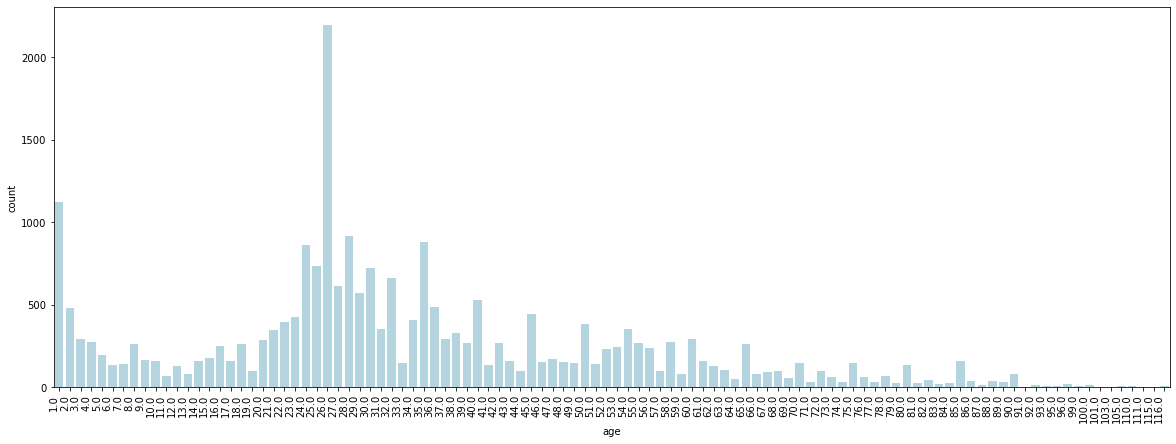

In [25]:
plt.figure(figsize=(20,7))
plot=sns.countplot(x='age',color='lightblue', data=df) #age distribution
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [26]:
# Minumim and Maximum age in our dataset
print("Minumim age in our dataset : ",min(df["age"].unique()))
print("Maximum age in our dataset : ",max(df["age"].unique()))

Minumim age in our dataset :  1.0
Maximum age in our dataset :  116.0


**As we see, our dataset consists a facial images of people whose ages are between (1-116)**



<AxesSubplot:xlabel='gender', ylabel='count'>

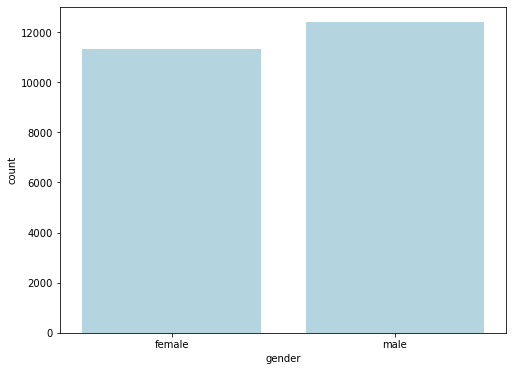

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender',color='lightblue', data=df) #gender distribution

<AxesSubplot:xlabel='race', ylabel='count'>

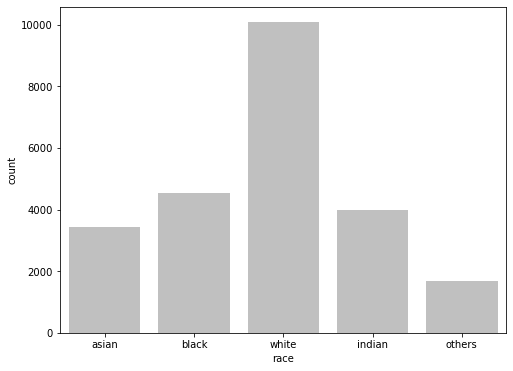

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='race',color='silver', data=df) #ethnicity distribution

## Store Data in SQL

In [29]:
conn = sql.connect('cleaned_data.db')
df.to_sql('cleaned_data', conn)

ValueError: Table 'cleaned_data' already exists.